# Machine learning avec les modules Python tensorflow2/keras :

# Entraînement / exploitation d'un réseau de neurones convolutif pour la reconnaissance de chiffres manuscrits

version 2.1 du 21 mai 2022

<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:normal"> 
    Il est fondamental d'utiliser un <span style="font-weight:bold;">Environnement Virtuel Python</span> (EVP) pour chaque projet Python important : l'EVP permet de maîtriser pour chaque projet les versions de l'interpréteur Python et des modules "sensibles" (comme tensorflow par exemple).</span></div>

Les <i>notebooks</i> de l'APP-ML doivent être chargés dans un processus `jupyter notebook` lancé dans l'EVP <b><span style="color: rgb(200, 51, 102);">minfo_ml</span></b> créé en suivant la procédure du document `Consignes.pdf`. Ils doivent être travaillés dans l'ordre :

- `ML1_MNIST.ipynb` : vérifier le bon fonctionnement de l’EVP <b><span style="color: rgb(200, 51, 102);">minfo_ml</span></b>, charger et utiliser les données de la banque MNIST (images et labels).
- `ML2_DNN.ipynb` : construire un réseau dense, l’entraîner avec les données de la banque MNIST et afficher ses performances.
- `ML3_DNN_suite.ipynb` : charger un réseau dense entraîné et l’exploiter avec les données de test  MNIST.
- `ML4_CNN.ipynb` : construire un réseau convolutif, l’entraîner avec la banque MNIST, afficher ses performances et à l'exploiter avec les données de test.
    
**Les notebooks `ML1_MNIST`, `ML2_DNN` et `ML3_DNN_suite` doivent être travaillés avant celui-ci.**

### Objectifs d'apprentissages visés :
- Apprendre le fonctionnement d'un réseau de neurones convolutif.
- Savoir construire un réseau de neurones convolutif à l'aide du module **keras**, utilisé comme interface du module **tensorflow**.
- Savoir entraîner le réseau à classifier les images du MNIST.
- Savoir exploiter le réseau entraîné.

# A/ Les Réseaux de Neurones Convolutifs (RNC)

## Principes généraux

Les Réseaux de Neurones Convolutifs (RNC, en anglais *CNN* :*Convolutionnal Neural Network*) proposent des structures particulièrement efficaces pour l'analyse du contenu des images. Pour cela les RNC mettent en oeuvre des traitements et une architecture et bien spécifiques :
- l'extraction des caractéristiques des images (*features*) à l'aide de filtres convolutifs,
- la réduction avec des filtres de *pooling* de la quantité d'information générée par les nombreux filtres de convolution,
- une architecture qui empile des couches "convolution > activation > pooling..." chargées d'extraire les caractéristiques de l'image qui sont au final applaties et envoyées en entrée d'un réseau dense chargé de l'étape de classification.

Dans la suite, nous allons construire un RNC inspiré du réseau `LeNet5`, un des premiers RNC proposé par Yann LeCun *et al.* dans les années 90 pour la reconnaisance des images MNIST :

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/LeNet5.png" ><br>
    [Lecun, Y.; Bottou, L.; Bengio, Y.; Haffner, P. (1998). "Gradient-based learning applied to document recognition". Proceedings of the IEEE. 86 (11): 2278–2324. doi:10.1109/5.726791.]
</p>

### Extraction des caractéristiques d'une image avec un filtre de convolution

La convolution d'une image par un filtre (aussi appelé noyau, *kernel*) consiste à déplacer une _petite fenêtre 2D_ ( 3x3, 5x5 ....) sur les pixels de l'image et à calculer à chaque fois le produit tensoriel contracté (somme des produits terme à terme) entre les élements du filtre et les pixels de l'image délimitée par la fenêtre du filtre.<br>

L'animation ci-dessous illustre la convolution d'une image 5x5 par un filtre 3x3 sans *padding* sur les bords : on obtient une nouvelle image plus petite de 3x3 pixels<br>
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/filter_3x3.png" width="80" style="display:inline-block;">
    <img src="img/Convolution_schematic.gif" width="300" style="display:inline-block;"><br>
    [crédit image : <a href="http://deeplearning.stanford.edu/tutorial">Stanford deep learning tutorial</A>]
</p>

Pour conserver la taille de l'image d'entrée, on peut utiliser la technique du *padding* pour ajouter de nouvelles données sur les bords de l'image (par dupplication des données sur les bords, ou ajout de lignes et colonnes de 0... par exemple) : 

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/padding.gif" width="350"><br>
    [crédit image : <a href="https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2"> Arden Dertat</a> ]
</p>

Le but de la convolution est d'extraire des caractéristiques particulières présentes dans l'image source : on parle de "carte des caractéristiques" (*feature map*) pour désigner l'image produite par l'opération de convolution. L'état de l'art conduit à utiliser plusieurs filtres convolutifs pour extraire des caractéristiques différentes : on peut avoir jusqu'à plusieurs dizaines de filtres convolutifs dans un même couche du réseau qui génèrent chacun une _feature map_, d'où une augmentation des données crées par ces opérations de convolution...

#### Exemples d'extraction de caractéristiques avec des filtres convolutifs connus (filtre de [Prewitt](https://fr.wikipedia.org/wiki/Filtre_de_Prewitt)):

À titre d'exemple, la figure ci-dessous montre les 4 *features maps* obtenues en convoluant une image MNIST (un chiffre 7) avec 4 filtres 3x3 bien connus en traitement d'image (filtres de Prewitt pour l'extraction de contours):

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/7_mnist_4_filtres.png" width="500"><br>
    [crédit image : JLC]
</p>

On voit que ces filtres agissent comme des filtres de détection de contour : dans les images de sortie, les pixels les plus blancs constituent ce que les filtres ont détecté :
- les filtre (a) et (c) détectent des contours horizontaux inférieurs et supérieurs,
- les filtre (b) et (d) détectent des contours verticaux droite et gauche.

Ces exemples très simples permettent de comprendre comment fonctionne l'extraction des *features* d'une image par filtrage convolutif. Dans les réseaux convolutifs les valeusr des éléments des filtres de convolution sont appris par le réseau.

###### Cas général : images RGB traitée par plusieurs filtres de convolution

Dans le cas général où les images correspondent à des tableaux 3D (la troisième dimension étant pour les 3 couleurs R(ed), G(reeen) &  B(lue)), le filtre de convolution est lui aussi un tableau 3D. L'opération reste identique au cas 1D : pour une position du filtre 3D sur l'image, le produit tensoriel contracté du filtre avec le sous-tableau 3D correspondant dans l'image fournit un nombre scalaire, et le balayage du procédé sur toute l'image donne la matrice des caractéristiques (*feature map*) de l'image. 

Par exemple si l'on utilise 10 filtres de convolution 5x5 (10 tableaux de dimensions (5,5,3)) pour traiter (avec  _padding_) une image RGB de 32x32 pixels (tableau de dimensions (32,32,3), on obtient une *feature maps*  de dimensions (32,32,10), soit 10240 termes alors que l'image source n'en a que 1024 !

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/conv_3D_10.png" width="350"><br>
    [crédit image : <a href="https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2"> Arden Dertat</a> ]
</p>

$\leadsto$ Pour réduire la quantité d'information générée par les filtres de convolution sans perdre trop d'information, la convolution est toujours suivie d'une opération de *pooling*.

#### Du filtre convolutif à la couche de neurones convolutifs

L'intégration du filtrage convolutif dans la structure du réseau de neurones donne l'organisation des calculs  suivante :

- Chaque filtre convolutif possède les mêmes coefficients pour les 3 couleurs : pour le réseau LeNet5 par exemple, chacun des 6 filtres 5x5x3 de la première couche possède seulement 25 coefficients, identiques pour les couleurs R, G & B.

- Chaque unité (neurone convolutif) d'une *feature map* de la couche C1 reçoit 75 pixels (25 pixels rouges $R_i$, 25 pixels vert $G_i$ et 25 pixels bleus $B_i$) délimités par la position du filtre convolutif dans l'image source.

- Le neurone $k$ d'une *feature map* calcule une sortie $y_k = F_a(\sum_{i=1}^{25}{\omega_i(R_i + G_i + B_i) - b_k})$, où $b_k$ est le biais du neurone $k$ et $F_a$ la fonction d'activation (très souvent `relu`).

- pour les 6 filtres convolutifs de la couche C1, on a donc  6 x (25 + 1) paramètres, soit 156 paramètres inconnus pour cette couche qui seront déterminés par entraînement du réseau.

Le même schéma est utilisé dans toutes les couches convoltionnelles.


### Le *pooling*

Le *pooling* vise à réduire la quantité de données à traiter. Comme pour l'opération de convolution, on déplace un filtre sur les éléments du tableau *feature map*  et à chaque position du filtre sur le tableau, on calcule un nombre représentant tous les éléments sélectionnés dans le filtre (par exemple la valeur maximale, ou la moyenne....). Mais contrairement à la convolution, on déplace le filtre sans recouvrement.<br>
Dans l'exemple simplifié ci-dessous, le filtre *max spool* transforme la matrice 8x8 en une matrice 4x4 qui décrit "à peu près" la même information mais avec moins de données :
<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/max_pool_2x2.png" width="350"><br>
    [crédit image : JLC</a> ]
</p>

## Travail à faire
### 1 - Charger et mettre en forme les données MNIST<br>2 - Construire le réseau de neurones convolutif<br>3 - Entraîner le réseau avec test à chaque *epoch*<br>4 - Exploiter le réseau avec les données de test MNIST

## Import des modules Python

Le module **keras** qui permet une manipulation de haut niveau des objets **tensorflow** est intégré dans le module **tensorflow** (tf) depuis la version 2. <br>
La documentation du module **tf.keras** à consulter pour cet APP est ici : https://www.tensorflow.org/api_docs/python/tf/keras. 

In [1]:
# supprimer l'affichage des warnings tensorflow:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sys, cv2
import matplotlib.pyplot as plt
print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.8.13
tensorflow: 2.8.0 incluant keras 2.8.0
numpy     : 1.21.2
OpenCV    : 4.5.1


Incrustation des tracés matplotlib dans le notebook :

In [3]:
%matplotlib inline

## 1 - Charger et mettre en forme les données MNIST

Le travail de chargement des images MNIST a été traité dans le *notebook* `ML1_MNIST.ipynb` :

In [4]:
# Charger les données du MNIST :
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()

# Définir les paramètres importants :
nb_im_test  = im_test.shape[0]     # nombre d'images de test 
nb_pixel    = im_test[0].size      # nombre d'éléments (des pixels) de la première image de test 
nb_classe   = len(set(lab_test))   # nombre de classe à identifier (les 10 chiffres de 0 à 9)

print(f"{nb_im_test} images de test")
print(f"{nb_pixel} pixels dans chaque image")
print(f"{nb_classe} classes à reconnaître (les chiffres de 0 à 9)")

10000 images de test
784 pixels dans chaque image
10 classes à reconnaître (les chiffres de 0 à 9)


### Mise en forme des données d'entrée

Les couches convolutionnelles du module *kera*s attendent par défaut des tableaux à 4 dimensions `(batch_size, height, width, depth)` :
- `batch_size` : nombre d'image en entrée,
- `height` et `width` : hauteur et largeur des images (en pixels),
- `depth` : profondeur des tableaux (`3` pour une image RGB, `1` pour une image en ton de gris).

La forme des images MNIST est :

In [5]:
im_train.shape, im_test.shape

((60000, 28, 28), (10000, 28, 28))

Il faut donc rajouter une dimension (égale à `1`) après la troisième dimension `28`, par exemple avec la méthode `reshape` des tableaux `ndarray` de numpy.

Compléter la cellule suivante pour définir `x_train` et `x_test` obtenus :
- en ajoutant une quatrième dimension égale à 1 aux tableaux `im_train` et `im_test` 
- et en normalisant les valeurs.

In [6]:
# avec  la méthode reshape des tableaux ndarray de numpy :
x_train = im_train.reshape(im_train.shape + (1,))
x_test  = im_test.reshape(im_test.shape + (1,))
x_train = x_train/ 255.
x_test  = x_test/255

Vérification :

In [7]:
im_train.shape, x_train.shape, im_test.shape, x_test.shape

((60000, 28, 28), (60000, 28, 28, 1), (10000, 28, 28), (10000, 28, 28, 1))

### Mise au format *one-hot* des labels MNIST

Le travail de transformation en vecteurs *one-hot* des labels MNIST a été traité dans le *notebook* `ML2_DNN.ipynb` :

In [8]:
from tensorflow.keras.utils import to_categorical
# 'one-hot' encoding' des labels :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

## 3 - Construire le réseau de neurones convolutif

On va maintenant construire dans la cellule ci-dessous le réseau de neurones **convolutionnel** à l'aide du module **keras**.

Comme pour le réseau dense, on crée un objet `model` instance de la classe `Sequential` (cf [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)), puis on complète `model` de façon  incrémentale en ajoutant chaque couche avec la méthode `add` :

- La couche d'entrée de type `InputLayer` (cf [tf.keras.layers.InputLayer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer)) sert à spécifier la forme des données d'entrée.<br>
La forme attendue par keras pour des images en entrée est (height, width, depth) : on pourra l'obtenir par exemple avec l'attribut `shape` de n'importe quelle image du tableau `x_train`.<br><br>

- Les couches convolutionnelles sont de type `Conv2D` (cf [tf.keras.layers.Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)) :
    - les 2 premiers arguments positionnels sont : 
        - le nombre de filtres de la couche
        - la forme du filtre : on peut spécifier  `N` ou `(N,N)` pour spécifier un filtre N x N
    - les autres arguments nommés utilisés sont :
        - `stride` : le pas du déplacement du filtre de convolution, valeur par défaut :  `stride=1` (équivalent à `(1, 1)`))
        - `padding=valid` : pas de padding, ou `padding=same` : sortie de mêmes dimensions que l'entrée (défaut : `valid`)
        - `activation` : choix de la fonction d'activation (`'relu'`, '`tanh'`...)<br><br>
        
- Les couches de *pooling* du réseau LeNet5 historique utilisent un filtre *average pool* qui correspond à la classe `AveragePooling2D`  (cf [tf.keras.layers.AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)), mais on aura de meilleurs résultats avec un filtrage *max pool* qui retient la valeur max des pixels dans la fenêtre du filtre (voir la page [tf.keras.layers.MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)). Principaux arguments à utiliser avec `MaxPool2D` :
    - `pool_size` :  `N` ou `(N,N)` pour spécifier un filtre N x N (défaut : `(2,2)`)
    - `strides` : int, tuple de 2 int, ou None. Si None (valeur par défaut), prend la même valeur que `pool_size`
    - `padding` : comme pour la classe `Conv2D`<br><br>

- Pour aplatir les 16 *feature maps* 5x5 en un vecteur de 16 * 5 * 5 = 635 éléments, on peut utiliser une couche  `Flatten` (cf [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten))<br><br>

En s'inspirant de la structure du réseau `LeNet5` et des spécifications ci-dessus, on obtient :
- couche d'entrée : `Input(shape=x_train[0].shape)` : on utilise l'attribut `shape` de la 1ère image qui vaut (28,28,1).
- couche C1 : `Conv2D(6, 5, padding='same', activation='relu', name='C1')`
- couche S2 : `MaxPool2D(pool_size=2, name='S2')`
- couche C3 : `Conv2D(16, 5, padding='valid', activation='relu', name='C3')`
- couche S4 : `MaxPool2D(pool_size=2, name='S4')`
- couche d'applissement : `Flatten()`
- couche C5 : `Dense(200, activation='relu', name='C5')`
- couche F5 : `Dense(84, activation='relu', name='F6'`
- couche OUTPUT : `Dense(nb_classe, activation='softmax', name='Output')`

Une fois construit, le réseau doit être compilé (au sens de tensorflow) avec la méthode `compile` en utilisant par exemple les arguments :
- `loss='categorical_crossentropy'` : choix de la fonction d'erreur (cf [tf.keras.categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy))
- `optimizer='adam'` : choix de l'optimiseur Adam (cf page [tf.keras.optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam))
- `metrics=['accuracy']` pour obtenir les données permettant de tracer les courbes de performance.

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D,  MaxPool2D, Flatten

# fixer la graine des générateurs aléatoires utilisés par tensorflow:
SEED = 1234
tf.random.set_seed(SEED)

model = Sequential(name='lenet')
model.add(Input(shape=x_train[0].shape))
model.add(Conv2D(6, 5, padding='same', activation='relu', name='C1'))
model.add(MaxPool2D(pool_size=2, name='S2'))
model.add(Conv2D(16, 5, padding='valid', activation='relu', name='C3'))
model.add(MaxPool2D(pool_size=2, name='S4'))
model.add(Flatten())
model.add(Dense(200, activation='relu', name='C5'))
model.add(Dense(84, activation='relu', name='F6'))
model.add(Dense(nb_classe, activation='softmax', name='Output'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Avec la méthode `summary` de l'objet `model`, faire afficher la description du modèle : noter les valeurs des paramètres...

In [10]:
model.summary()

Model: "lenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 28, 28, 6)         156       
                                                                 
 S2 (MaxPooling2D)           (None, 14, 14, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 10, 10, 16)        2416      
                                                                 
 S4 (MaxPooling2D)           (None, 5, 5, 16)          0         
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 C5 (Dense)                  (None, 200)               80200     
                                                                 
 F6 (Dense)                  (None, 84)                16884 

La fonction `tf.keras.utils.plot_model` permet aussi de dessiner la structure du réseau (voir la page [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)).<br>
Faire tracer la structure du modèle en ajoutant l'option `show_shapes=True` à l'appel de `model` :

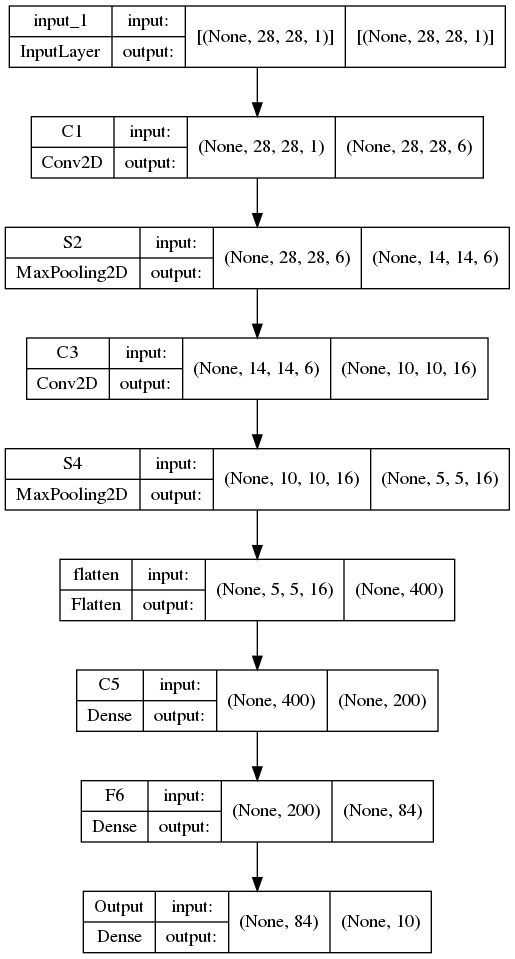

In [11]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Sauvegarde de l'état initial du  réseau

On peut sauvegarder l'état initial des poids du réseau non-entraîné (valeurs aléatoires) avec la méthode `Model.save_weights`. <br>
Ce sera utile plus loin pour remettre le réseau à son état initial avant de relancer d'autres entraînements :

In [12]:
import os

# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("weights"): os.mkdir("weights")

# sauvegarde des poinds du réseau initial:
key = 'conv1_init'
model.save_weights('weights/'+key)

# afficher les fichiers créés:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/conv1_init.data-00000-of-00001
weights/conv1_init.index


Remarque : la méthode `save_weights` utilise la partie `key` du chemin passé en argument pour préfixer les fichiers créés.<br>
Lors de la lecture ultérieure des poids du réseau avec la méthode `load_weights` de la classe `Sequential`, il suffira de donner la même information pour retrouver les bons fichiers.

## 3 - Entraîner le réseau avec test à chaque *epoch*

Consulter au besoin la documentation de la méthode `fit` dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). 

Compléter la cellule ci-dessous pour entraîner le réseau en utilisant la méthode `fit` de l'objet `model` avec les arguments :
- `x_train` : les 60000 images 
- `y_train` : les 60000 labels encodés *one-hot*.
- `epochs=10` : faire 10 fois l'entraînement complet.
- `batch_size=64` : découper le jeu des données d'entrée (les 60000 images) en "lots" (*batch*) de taille `batch_size`.<br>
La mise à jour des poids du réseau est faite au bout de `batch_size` échantillons d'entrée. La valeur de `batch_size` (par défaut est 32) est un paramètre qui influe beaucoup sur la qualité de l'apprentissage : on peut essayer d'autres valeurs (64, 128 ...) et observer comment évoluent les performances d'entraînement).

Pour avoir un indicateur réaliste de la qualité du réseau entraîné on teste à chaque `epoch` la précison du réseau entraîné en utilisant les images de test : il faut passer l'agument `validation_data` à la méthode `fit`, en lui affectant le tuple des données de test `(x_test, y_test)`

In [13]:
# au cas on on exécute plusieurs fois cette cellule, il faut ré-initialiser 
# les poids du réseau à leur valeur initiale si on veut comparer les entraînements...
key = 'conv1_init'
model.load_weights('weights/'+key)  

# fixer la graine des générateurs aléatoires utilisés par tensorflow:
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                    batch_size=64,
                    epochs=10)

Epoch 1/10
938/938 [==============================] - 13s 13ms/step - loss: 0.2233 - accuracy: 0.9320 - val_loss: 0.0628 - val_accuracy: 0.9800
Epoch 2/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0673 - accuracy: 0.9797 - val_loss: 0.0627 - val_accuracy: 0.9787
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0453 - val_accuracy: 0.9847
Epoch 4/10
938/938 [==============================] - 13s 13ms/step - loss: 0.0368 - accuracy: 0.9880 - val_loss: 0.0349 - val_accuracy: 0.9879
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0347 - val_accuracy: 0.9887
Epoch 6/10
938/938 [==============================] - 12s 12ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 0.0359 - val_accuracy: 0.9882
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0305 - val_accuracy:

L'objet `hist` retourné par la méthode `fit` possède un attribut `history` de type dictionnaire dont les clefs `'loss'`, `'accuracy'` contiennent l'évaluation de la fonction de cout et de la précision du réseau à la fin de chaque (*epoch*) avec les données d'entraînement. Les clefs `'val_loss'` et `'val_accuracy'` sont associées aux données de test.

In [14]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

[0.22328704595565796, 0.0672694593667984, 0.04675300791859627, 0.03677825257182121, 0.03046717494726181, 0.02555622160434723, 0.02072431892156601, 0.01748409867286682, 0.015374141745269299, 0.013024747371673584]
[0.9319999814033508, 0.9796500205993652, 0.9854000210762024, 0.9879999756813049, 0.9907500147819519, 0.9918333292007446, 0.9931166768074036, 0.9938499927520752, 0.9947500228881836, 0.9957333207130432]
[0.06279595196247101, 0.06266125291585922, 0.045282717794179916, 0.03488500788807869, 0.03474191203713417, 0.03590938821434975, 0.0305321142077446, 0.030082983896136284, 0.03724551200866699, 0.035299867391586304]
[0.9800000190734863, 0.9786999821662903, 0.9847000241279602, 0.9879000186920166, 0.9886999726295471, 0.9882000088691711, 0.9900000095367432, 0.9908999800682068, 0.9890000224113464, 0.9894999861717224]


#### Tracé des courbes `accuracy` et `loss`  de l'entraînement et des test :

La fonction `plot_loss_accuracy` du module `utils.tools` (présent dans le répertoire du notebook) permet de tracer les courbes de précision et de perte en utilisant les données stockées dans l'objet `hist`. Faire tracer ces courbes :

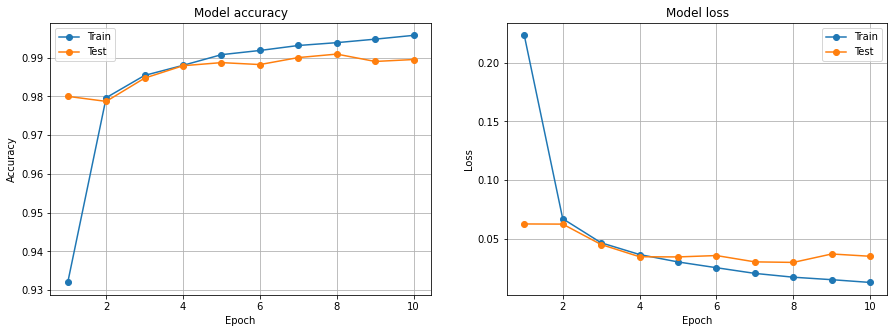

In [16]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

### Arrêter automatiquement l'entraînement avant *over-fit*

Keras propose des outils pour arrêter automatiquement l'apprentissage en surveillant par exemple la croissance de `val_accuracy` ou la décroisance de `val_losss` d'une `epoch` à l'autre (cf le callback  [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)).

On peut ainsi définir une liste de fonctions *callback* que l'on peut passer en argument à la fonction `fit` avec l'agument nommé  `callbacks` :

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks_list = [
    EarlyStopping(monitor='val_accuracy',  # la grandeur à surveiller
                  patience=2,              # accepter que 'val_accuracy' diminue 2 fois en tout
                  mode='max',              # arrêter si le paramètre décroît 
                  restore_best_weights=True,
                  verbose=1)
]

# recharger l'état initial du réseau:
key = 'conv1_init'
model.load_weights('weights/'+key)  

# fixer la graine des générateurs aléatoires utilisés par tensorflow:
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=15, 
                    batch_size=68, 
                    callbacks = callbacks_list)

Epoch 1/15
883/883 [==============================] - 12s 13ms/step - loss: 0.1807 - accuracy: 0.9435 - val_loss: 0.0656 - val_accuracy: 0.9790
Epoch 2/15
883/883 [==============================] - 11s 13ms/step - loss: 0.0568 - accuracy: 0.9830 - val_loss: 0.0435 - val_accuracy: 0.9853
Epoch 3/15
883/883 [==============================] - 12s 13ms/step - loss: 0.0407 - accuracy: 0.9878 - val_loss: 0.0404 - val_accuracy: 0.9871
Epoch 4/15
883/883 [==============================] - 12s 14ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0297 - val_accuracy: 0.9898
Epoch 5/15
883/883 [==============================] - 12s 14ms/step - loss: 0.0260 - accuracy: 0.9913 - val_loss: 0.0348 - val_accuracy: 0.9891
Epoch 6/15
883/883 [==============================] - 11s 13ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0329 - val_accuracy: 0.9895
Epoch 6: early stopping


Tracer les courbes `loss` et `accuracy` :

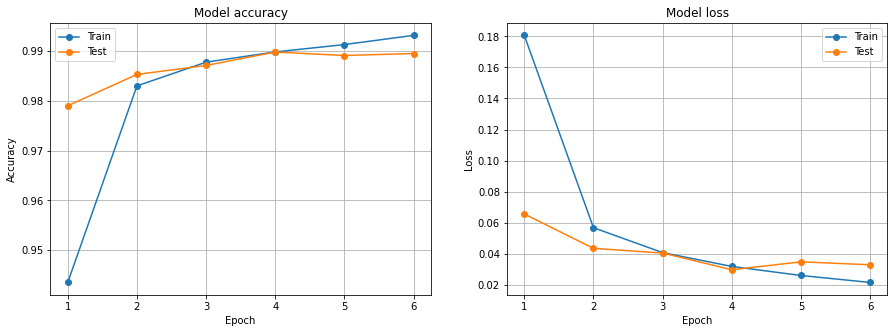

In [18]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

Le réseau convolutionnel tend vers une meilleure précision voisine de 99%.

### Sauvegarder les poids du  réseau entraîné

La méthode `save_weights` de la classe `Sequential`permet d'enregistrer les **poids** du réseau entraïné dans un fichier :

In [19]:
import os
# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("weights"): os.mkdir("weights")

# sauvegarde des poids du réseau entrainé:
key = 'conv1_trained'
model.save_weights('weights/'+key)

# afficher les fichiers créés:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/conv1_trained.data-00000-of-00001
weights/conv1_trained.index


### Sauvegarder la structure du réseau et ses poids

La méthode `save` de la classe `Sequential` permet d'enregistrer **toute la structure et les poids** du réseau entraïné dans un fichier.<br />
Ceci permet de recréer plus tard *from scratch* le réseau entrainé pour passer en phase exploitation du réseau par exemple, en utilisant la fonction`tf.keras.models.load_model` :

In [20]:
import os
# vérifier que le dossier 'weights' existe et sinon le créer:
if not os.path.exists("models"): os.mkdir("models")

# sauvegarder structure réseau + poids :
key = 'conv1_trained'
model.save('models/'+key) 

# afficher les fichiers créés:
files=[os.path.join("models",f) for f in os.listdir("models") if f.startswith(key)]
for f in files: print(f)

INFO:tensorflow:Assets written to: models/conv1_trained/assets
models/conv1_trained


## 4 - Exploiter le réseau entraîné : méthode `predict`

La méthode `predict` de l'objet `model` permet de calculer les inférences du réseau pour une ou plusieurs entrées (voir la méthode `predict`dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict)).

La cellule ci-dessous montre la mise en oeuvre de la méthode `predict` :

La méthode `predict` de l'objet `model` permet de calculer les inférences du réseau pour une ou plusieurs entrées (voir la méthode `predict`dans la page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)).

La cellule ci-dessous montre la mise en oeuvre de la méthode `predict`, et comment exploiter la représentation  *one-hot* renvoyée par `fit` en utilisant la méthode `argmax` des tableaux de numpy :

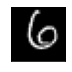

Inférence du réseau pour l'image n° 100 :
[1.1019555e-05 4.1601956e-07 1.1481467e-06 9.0669282e-08 1.3884319e-05
 2.3424505e-05 9.9994469e-01 3.5247308e-07 4.6518394e-06 2.4519025e-07]


In [21]:
i = 100  # numéro de l'image de test choisie

# afficher l'image :
from utils.tools import plot_images
plot_images(im_test,i,1,1) ; plt.show()

# inférence du réseau entrainé pour l'image choisie: 
rep = model.predict(x_test[i:i+1])      # Attention: x doit être un tableau de matrices...
                                        # => x[i] ne convient pas !

print(f"Inférence du réseau pour l'image n° {i} :\n{rep[0]}")

pour rendre plus lisible la sortie du réseau, on peut limiter à 2 chiffre après la virgule l'affichage du tableau numpy :

In [22]:
with np.printoptions(formatter={'float':'{:.2f}'.format}):    
    print(f"Inférence du réseau pour l'image n° {i} arrondie à 2 chiffre :\n{rep[0]}")

Inférence du réseau pour l'image n° 100 arrondie à 2 chiffre :
[0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


La méthode `argmax` des tableaux *ndarray* de *numpy* permet d'obtenir le rang de la valeur maximale :

In [23]:
print(f"Le label prédit par le réseau est rep[0].argmax() : {rep[0].argmax()}")
print(f"Le label associé à l'image choisie est lab_test[{i}] : {lab_test[i]}")

Le label prédit par le réseau est rep[0].argmax() : 6
Le label associé à l'image choisie est lab_test[100] : 6


### Utilité de la méthode `argmax` de numpy pour décoder le tableau de vecteurs *one-hot* renvoyé par la méthode `predict`

Quand on calcule une inférence du réseau `model` avec les images du tableau `x_test` par exemple, on obtient un résultat qui est un tableau de vecteurs *one-hot* :

In [24]:
results = model.predict(x_test)
print("forme du tableau 'results':", results.shape)
print("allure des vecteurs du tableau 'result' :")
with np.printoptions(formatter={'float':'{:.2f}'.format}): 
    print("results[0]  :", results[0])
    print("results[-1] :", results[-1])

forme du tableau 'results': (10000, 10)
allure des vecteurs du tableau 'result' :
results[0]  : [0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00]
results[-1] : [0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00]


Avec l'expression `results.argmax(axe=-1)`, on obtient le tableau des `argmax` de chaque vecteur $\leadsto$ c'est directement le tableau des chiffres reconnus par le réseau :

In [25]:
inferences = results.argmax(axis=-1)
print(f"inferences.shape: {inferences.shape}, inferences.dtype: {inferences.dtype}")
print(f"contenu du tableau inferences : {inferences}")

inferences.shape: (10000,), inferences.dtype: int64
contenu du tableau inferences : [7 2 1 ... 4 5 6]


On peut comparer le tableau `inférences` et le tableau `lab_test` avec l'operateur `==` (cela a un sens avec les tableaux *ndarray* du module *numpy*) :

In [26]:
inferences == lab_test

array([ True,  True,  True, ...,  True,  True,  True])

en comptant le nombre de `True` dans le résultat, on a directement le nombre d'inférences justes :

In [27]:
reponse_ok = (inferences == lab_test)
print(f"nombre de réponses justes : {reponse_ok.sum()} sur {nb_im_test} images de test")
precision = reponse_ok.sum()/nb_im_test*100
print(f"performance du réseau entraîné : {precision} % de réponses justes")

nombre de réponses justes : 9898 sur 10000 images de test
performance du réseau entraîné : 98.98 % de réponses justes


###  Afficher la matrice de confusion

In [28]:
from utils.tools import show_cm
help(show_cm)

Help on function show_cm in module utils.tools:

show_cm(true, results, classes)
    true  : the actual labels 
    results : the labels computed by the trained network (one-hot format)
    classes : list of possible label values



Faire afficher la matrice de confusion en lui passant les labels attendus `lab_test` et les labels calculés par le model :

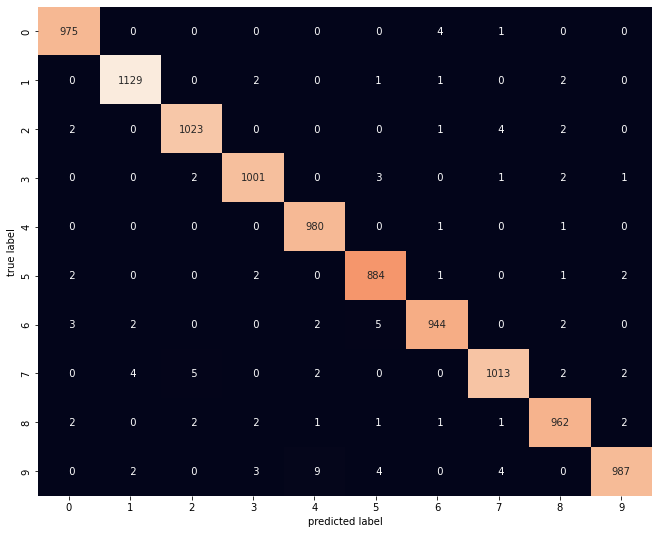

In [29]:
show_cm(lab_test, results, range(nb_classe))

# Autres ressources intéressantes... des vidéos :

In [30]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [31]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [32]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [33]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>